In [2]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### Preprocessing

In [3]:

df = pd.read_csv("../datasets/titanic.csv")
# 1. identifying categorical and numerical features
features = ['Sex', 'Embarked', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical_features= ['Sex', 'Embarked']
numerical_features=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

#2. preprocessing for numerical data, median to impute missing value and standard scaling for bringing mean to 0 and std var to 1
numerical_transformer= Pipeline(steps=
                                [('imputer' , SimpleImputer(strategy='median')),
                                ('scaler', StandardScaler())] )

# 3. preprocessing for categorical data
categorical_transformer=Pipeline(steps=[
('imputer', SimpleImputer(strategy='most_frequent')),
('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# 4. Bundle Processing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ]
)


In [4]:
x= df[features]
y = df["Survived"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)
# Preprocess the training and test data
X_train_preprocessed = preprocessor.fit_transform(x_train)
X_test_preprocessed = preprocessor.transform(x_test)


### Implementing Decision Tree

In [5]:

# consider techbiques such as cross validation for finding the optimal max_depth to avoid underfitting or overfitting
classifier = tree.DecisionTreeClassifier(max_depth= 4,random_state=42)
classifier.fit(X_train_preprocessed, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

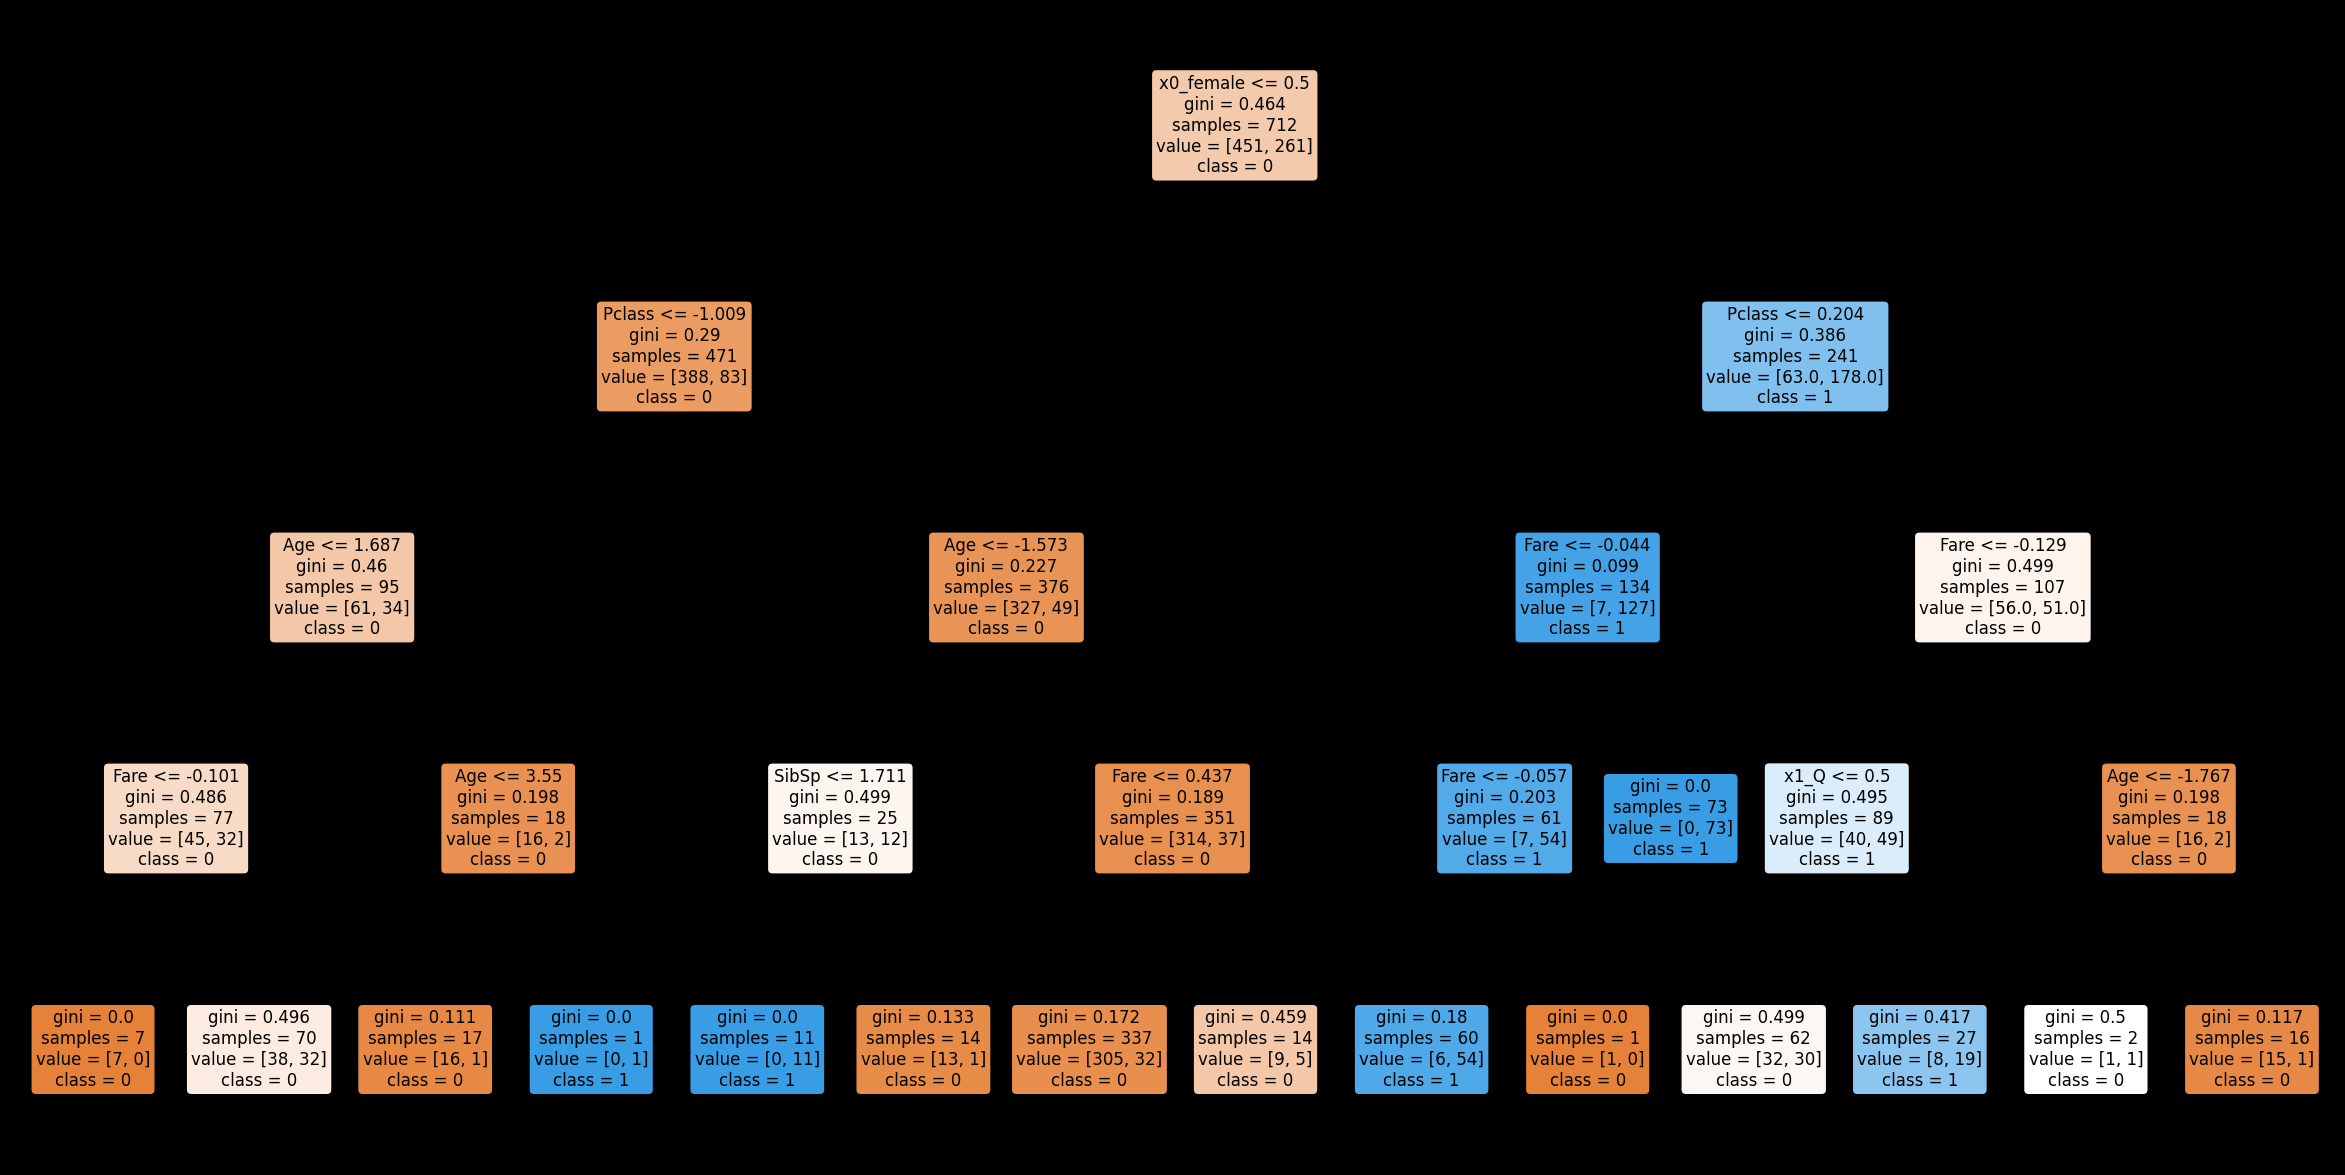

In [6]:
#visualing the tree

plt.figure(figsize=(30, 15), facecolor='k')

feature_names_cat = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out()
feature_names = list(feature_names_cat) + numerical_features

class_names = [str(cls) for cls in y.unique()]

tree.plot_tree(classifier, feature_names=feature_names, class_names=class_names, rounded=True, filled=True, fontsize=12)

plt.show()

In [7]:
ypred = classifier.predict(X_test_preprocessed)

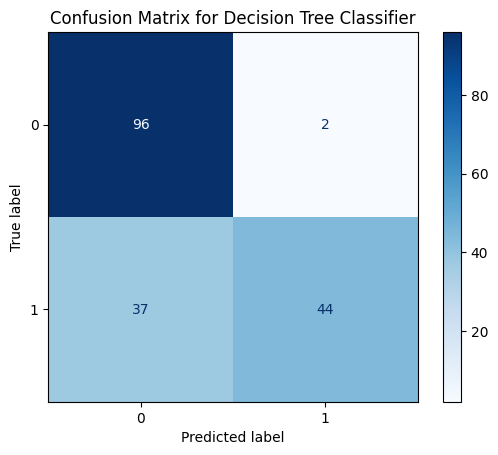

In [8]:
from sklearn import metrics 
cnf= metrics.confusion_matrix(y_test, ypred)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cnf, display_labels=classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()


In [10]:
accuracy = metrics.accuracy_score(y_test, ypred)
recall = metrics.recall_score(y_test, ypred )
precision = metrics.precision_score(y_test, ypred)
print("accuracy: ", accuracy)
print("recall: ", recall)
print("precision: ", precision)


accuracy:  0.7821229050279329
recall:  0.5432098765432098
precision:  0.9565217391304348
